In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [12]:
def exp(tau):
    return -tau*np.log(1-np.random.uniform())

In [13]:
def pdf(N,t0):
    return np.array([exp(t0) for i in range(N)])

(array([550., 245., 115.,  51.,  22.,   7.,   6.,   2.,   1.,   1.]),
 array([8.68186401e-03, 3.93034461e+00, 7.85200735e+00, 1.17736701e+01,
        1.56953328e+01, 1.96169956e+01, 2.35386583e+01, 2.74603211e+01,
        3.13819838e+01, 3.53036465e+01, 3.92253093e+01]),
 <BarContainer object of 10 artists>)

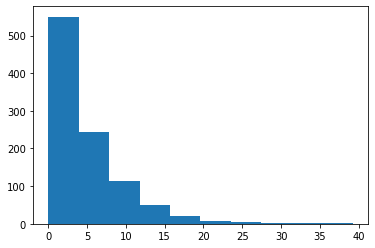

In [14]:
N = 1000
t0 = 5
dat = pdf(N,t0)
plt.hist(dat)

In [15]:
def likelihood(dati,t):
    
    return np.prod([np.exp(-i/t)/t for i in dati])

In [16]:
dati = pdf(10,5)

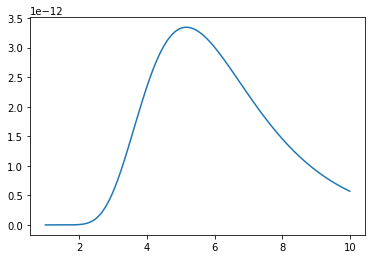

In [17]:
#Likelihood
rang = np.linspace(1,10,1000)

like = [likelihood(dati,t) for t in rang]

plt.plot(rang,like)
# plt.plot(rang,np.log(like))

In [18]:
def logLikelihood(dati,t):
    
    return np.sum([np.log(np.exp(-i/t)/t) for i in dati])

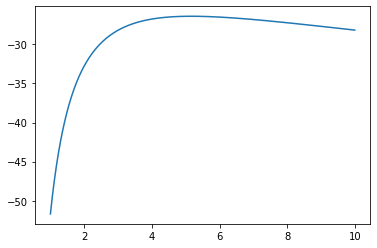

In [19]:
logLike = [logLikelihood(dati,t) for t in rang]

plt.plot(rang,logLike)

In [ ]:
l = [logLikelihood(dati,t) for i in rang]

